## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Importing the dataset

In [4]:
#Importing th dataset using pandas and displaying he first 10 rows of the dataset
raw_data = pd.read_csv(r'C:\Users\Tanmay\Desktop\Datasets\health insurance.csv')
raw_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Data Preprocessing

### Exploring the discriptive stats of the dataset

In [6]:
raw_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


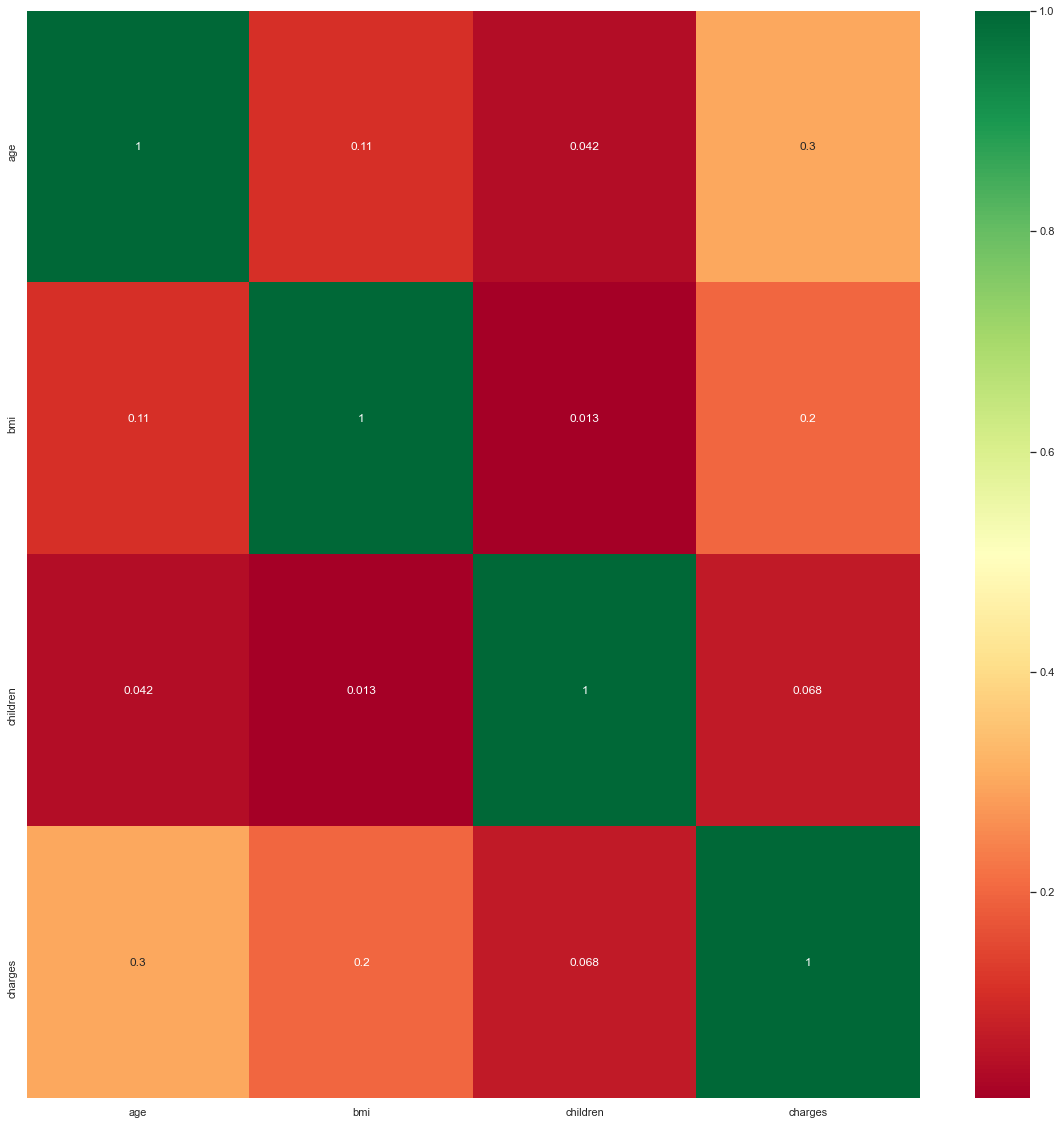

In [7]:
corrmat = raw_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(raw_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Dealing with missing values

In [8]:
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploring the PDFs

In [9]:
data = raw_data

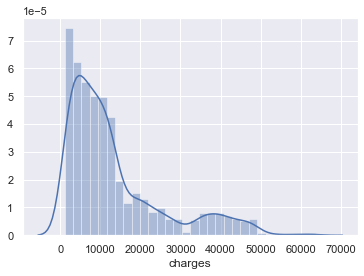

In [11]:
sns.distplot(data['charges'])

### Dealing with outliers

In [12]:
q = data['charges'].quantile(0.99)
data_1 = data[data['charges']<q]
data_1.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1324.000000,1324,1324.000000,1324.000000,1324,1324,1324.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,667,NaN,NaN,1064,357,NaN
mean,39.089879,NaN,30.585400,1.097432,NaN,NaN,12847.275434
std,14.025792,NaN,6.067911,1.206693,NaN,NaN,11435.272603
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,4710.601913
50%,39.000000,NaN,30.275000,1.000000,NaN,NaN,9283.021300
75%,51.000000,NaN,34.443750,2.000000,NaN,NaN,16073.095438


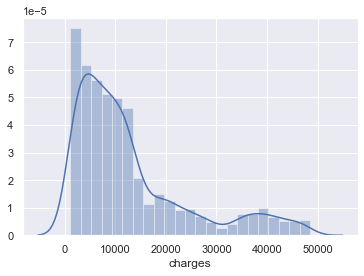

In [14]:
sns.distplot(data_1['charges'])

In [15]:
data_cleaned = data_1

### Checking for OLS Assumptions

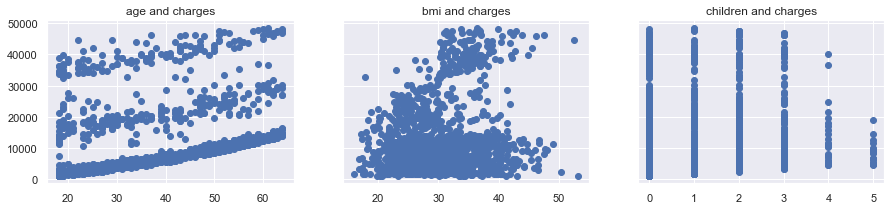

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['age'],data_cleaned['charges'])
ax1.set_title('age and charges')
ax2.scatter(data_cleaned['bmi'],data_cleaned['charges'])
ax2.set_title('bmi and charges')
ax3.scatter(data_cleaned['children'],data_cleaned['charges'])
ax3.set_title('children and charges')


plt.show()

### Relaxing the assumptions

In [17]:
log_charges = np.log(data_cleaned['charges'])
data_cleaned['log_charges'] = log_charges
data_cleaned

<ipython-input-17-a23785d52a1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['log_charges'] = log_charges


,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,9.268661
1334,18,female,31.920,0,no,northeast,2205.98080,7.698927
1335,18,female,36.850,0,no,southeast,1629.83350,7.396233
1336,21,female,25.800,0,no,southwest,2007.94500,7.604867


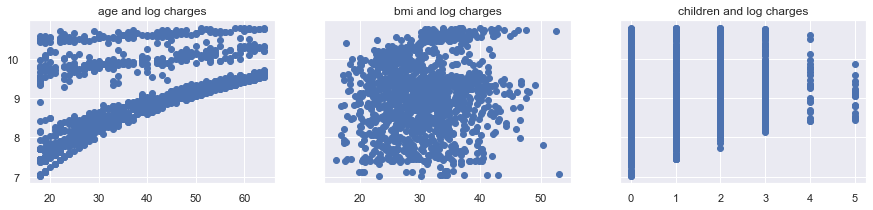

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['age'],data_cleaned['log_charges'])
ax1.set_title('age and log charges')
ax2.scatter(data_cleaned['bmi'],data_cleaned['log_charges'])
ax2.set_title('bmi and log charges')
ax3.scatter(data_cleaned['children'],data_cleaned['log_charges'])
ax3.set_title('children and log charges')


plt.show()

In [21]:
data_cleaned = data_cleaned.drop(['charges'],axis=1)

### Multi collinearity

In [22]:
data_cleaned.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'log_charges'],
      dtype=object)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['age','bmi','children']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [25]:
vif

,VIF,Features
0,7.464714,age
1,7.776428,bmi
2,1.800809,children


In [26]:
data_no_multicollinearity = data_cleaned.drop(['children'],axis=1)
# children is having the least impact so it can be dropped

### Creating dummies


In [28]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [29]:
data_with_dummies.head()

,age,bmi,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,9.734176,0,1,0,0,1
1,18,33.770,7.453302,1,0,0,1,0
2,28,33.000,8.400538,1,0,0,1,0
3,33,22.705,9.998092,1,0,1,0,0
4,32,28.880,8.260197,1,0,1,0,0


### Re-arranging the columns

In [30]:
data_with_dummies.columns.values

array(['age', 'bmi', 'log_charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype=object)

In [31]:
cols = ['log_charges' , 'age', 'bmi', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest']

In [32]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_charges,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,9.734176,19,27.900,0,1,0,0,1
1,7.453302,18,33.770,1,0,0,1,0
2,8.400538,28,33.000,1,0,0,1,0
3,9.998092,33,22.705,1,0,1,0,0
4,8.260197,32,28.880,1,0,1,0,0


## Linear Regression

### Declaring inputs and targets

In [33]:
targets = data_preprocessed['log_charges']
inputs = data_preprocessed.drop(['log_charges'],axis=1)

### Scaling the data

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [35]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

### Regression

In [37]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [38]:
y_hat = reg.predict(x_train)

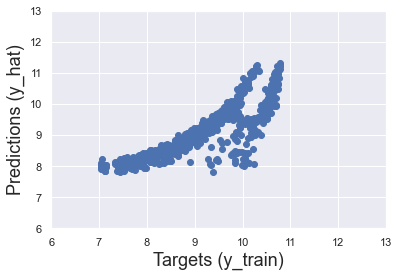

In [39]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

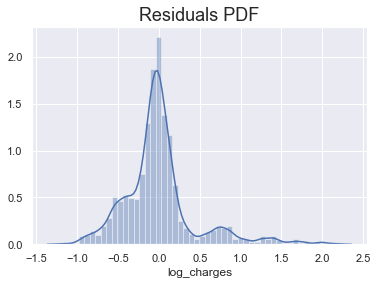

In [40]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [41]:
reg.score(x_train,y_train)

0.7529967646156315

### Finding weights and bias

In [43]:
reg.intercept_

9.07275613694242

In [44]:
reg.coef_

array([ 0.49489061,  0.08543023, -0.03036833,  0.61721329, -0.02710756,
       -0.074073  , -0.05980964])

In [45]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,age,0.494891
1,bmi,0.085430
2,sex_male,-0.030368
3,smoker_yes,0.617213
4,region_northwest,-0.027108
5,region_southeast,-0.074073
6,region_southwest,-0.059810


### Testing

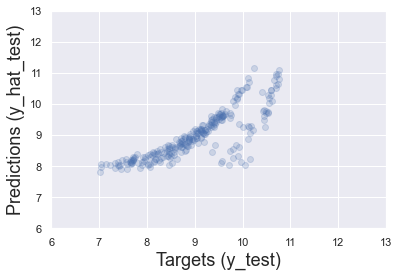

In [46]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [47]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,34057.908926
1,4191.929404
2,3297.189170
3,7506.754815
4,6512.163307


In [48]:
df_pf['Target'] = np.exp(y_test)
df_pf


,Prediction,Target
0,34057.908926,NaN
1,4191.929404,NaN
2,3297.189170,NaN
3,7506.754815,NaN
4,6512.163307,NaN
...,...,...
260,3660.645786,NaN
261,5742.029995,17085.26760
262,4866.597317,NaN
263,2731.640976,36219.40545


In [49]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    9.893339
1    8.029696
2    7.675249
3    9.126289
4    8.860144
Name: log_charges, dtype: float64

In [50]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,34057.908926,19798.05455
1,4191.929404,3070.80870
2,3297.189170,2154.36100
3,7506.754815,9193.83850
4,6512.163307,7045.49900
...,...,...
260,3660.645786,3847.67400
261,5742.029995,5836.52040
262,4866.597317,6653.78860
263,2731.640976,1720.35370


In [51]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [52]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,34057.908926,19798.05455,-14259.854376,72.026544
1,4191.929404,3070.80870,-1121.120704,36.508973
2,3297.189170,2154.36100,-1142.828170,53.047199
3,7506.754815,9193.83850,1687.083685,18.350156
4,6512.163307,7045.49900,533.335693,7.569878
...,...,...,...,...
260,3660.645786,3847.67400,187.028214,4.860812
261,5742.029995,5836.52040,94.490405,1.618951
262,4866.597317,6653.78860,1787.191283,26.859755
263,2731.640976,1720.35370,-1011.287276,58.783684


In [53]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,265.000000,265.000000,265.000000,265.000000
mean,11169.584644,12142.737668,973.153024,30.106887
std,11481.560985,11099.421424,7299.029284,31.723709
min,2481.460601,1121.873900,-40728.704108,0.060213
25%,4191.929404,4529.477000,-1243.302025,7.393024
50%,7048.038420,8413.463050,-132.948797,16.382126
75%,13186.706916,14590.632050,987.482209,48.082652
max,68830.037158,47496.494450,24636.035512,178.544325


In [54]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
61,3165.55,3167.46,1.91,0.06
162,6074.72,6082.41,7.69,0.13
192,8537.99,8551.35,13.36,0.16
143,8672.90,8688.86,15.96,0.18
52,14680.90,14711.74,30.84,0.21
74,3083.74,3077.10,-6.65,0.22
246,7237.52,7261.74,24.22,0.33
196,12079.85,12124.99,45.14,0.37
201,3458.31,3443.06,-15.25,0.44
72,32632.68,32787.46,154.78,0.47
